In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit



In [29]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [30]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [31]:
def getModel(year):
    df = pd.read_csv(year)
    df["New"]= int('0')
    df.sort_values(by = ['rate'], ascending= [True])
    for county in df:
        df["New"] =  abs(df.index - 58)+1
    df2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
    print(df2)
    model = DecayingSineModel()
    params = model.guess(df2['ccount'], x=df2['rate'])
    fit = model.fit(df2['ccount'], params, x=df2['rate'],nan_policy='omit')
    return fit, df2


In [32]:
f,df2= getModel('FentanylSeniors2016.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.933333
2    2.0  0.933333
3    3.0  0.966667
4    4.0  0.966667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: Futu

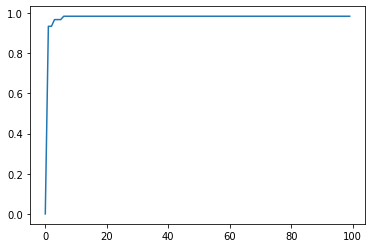

In [33]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [34]:
f.params["b"].value,f.params["d"].value

(0.3149316210424252, 0.05457872243689786)

In [35]:
f,df2= getModel('FentanylSeniors2016.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.933333
2    2.0  0.933333
3    3.0  0.966667
4    4.0  0.966667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: Futu

In [36]:
f.params["b"].value,f.params["d"].value

(0.3149316210424252, 0.05457872243689786)

In [37]:
df2

,rate,ccount
0,0.0,0.000000
1,1.0,0.933333
2,2.0,0.933333
3,3.0,0.966667
4,4.0,0.966667
...,...,...
95,95.0,0.983333
96,96.0,0.983333
97,97.0,0.983333
98,98.0,0.983333


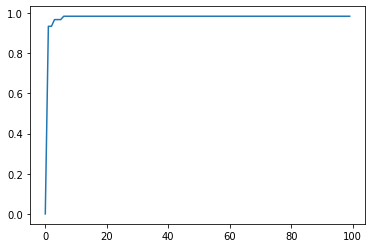

In [38]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [39]:
files = ['FentanylSeniors2021.csv','FentanylSeniors2020.csv','FentanylSeniors2019.csv','FentanylSeniors2018.csv','FentanylSeniors2017.csv','FentanylSeniors2016.csv',]
bval = []
dval = []
year = []
for file in files:
    f,df2 = getModel(file)
    year.append(file)
    bval.append(f.params["b"].value)
    dval.append(f.params["d"].value)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/660294330.py:9: Futu

    rate    ccount
0    0.0  0.000000
1    1.0  0.516667
2    2.0  0.516667
3    3.0  0.533333
4    4.0  0.566667
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.600000
2    2.0  0.616667
3    3.0  0.666667
4    4.0  0.733333
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.783333
2    2.0  0.850000
3    3.0  0.883333
4    4.0  0.900000
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.833333
2    2.0  0.866667
3    3.0  0.883333
4    4.0  0.883333
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 c

In [40]:
bval

[1.0045582260974846,
 0.9172894316958384,
 0.6494910380711731,
 0.6350634236308706,
 0.5275835197439819,
 0.3149316210424252]

In [41]:
year

['FentanylSeniors2021.csv',
 'FentanylSeniors2020.csv',
 'FentanylSeniors2019.csv',
 'FentanylSeniors2018.csv',
 'FentanylSeniors2017.csv',
 'FentanylSeniors2016.csv']

In [42]:
dval

[2.3501591877018106,
 1.005235976959877,
 0.2773789773902669,
 0.24043995758665201,
 0.12869775611525372,
 0.05457872243689786]

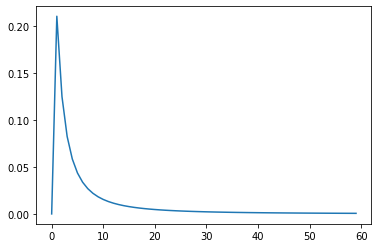

In [43]:
year_no=0
density_x=[]
rate_y=[]
for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2)) #derivativeofb&dequation
    rate_y.append(y_rate)

plt.plot(density_x,rate_y)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/2337317134.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  y_rate=d*b*pow(x,b-1)/(pow((q+d),2))


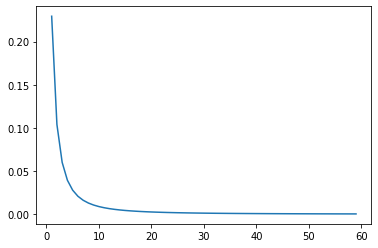

In [44]:
year_no=1
density_x=[]
rate_y=[]

for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

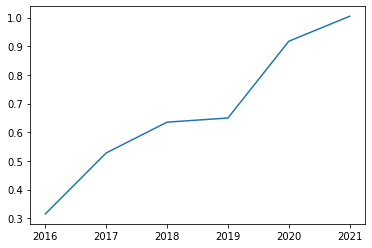

In [45]:
x = [2021,2020,2019,2018,2017,2016]
y = bval
plt.plot(x,y )

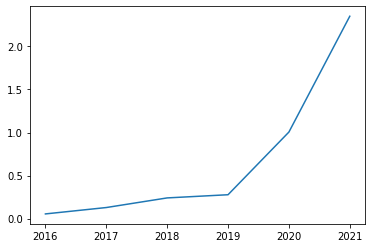

In [46]:
x = [2021,2020,2019,2018,2017,2016]
y = dval
plt.plot(x,y )

In [47]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))

In [48]:
bval_1 = bval[0:3]
bval_1

[1.0045582260974846, 0.9172894316958384, 0.6494910380711731]

In [55]:
plt.rcParams["figure.figsize"] = (20,10)

0
1
2
3
4
5


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87721/1062718043.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (d*b*pow(x,b-1))/(pow((q+d),2))


Text(0.5, 1.0, 'Density Curve: Senior Fentanyl Overdose Death Rates')

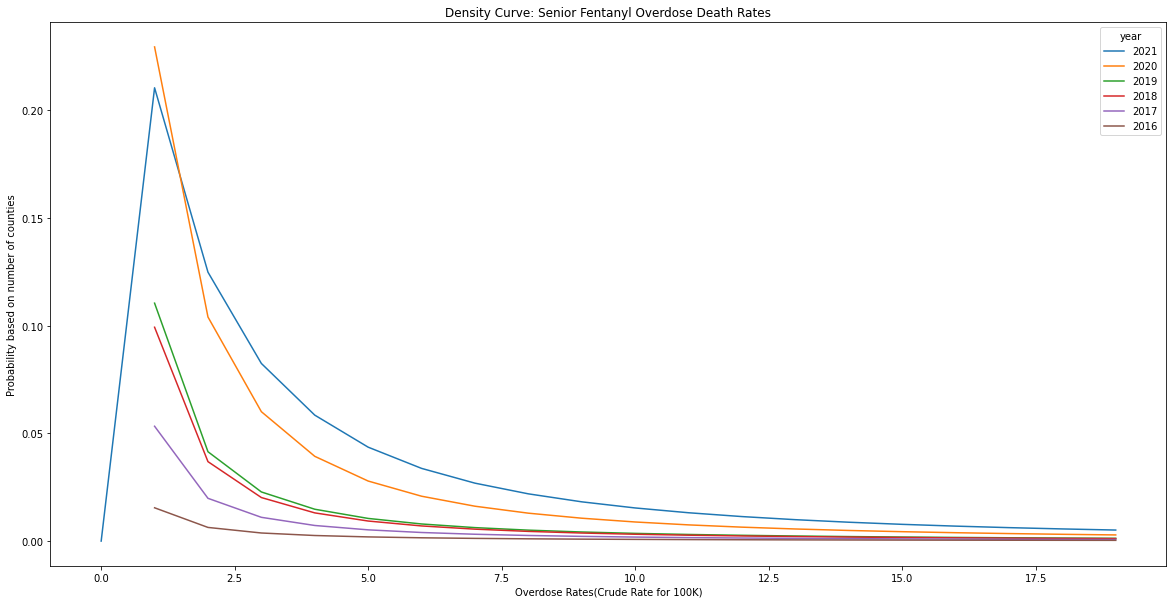

In [58]:
bval_1 = bval[0:7]
bval_1 = dval[0:7]
year2= [2021,2020,2019,2018,2017,2016,2015]
for m in range(len(bval_1)):
    print(m)
    x = []
    y= []
    b = bval[m]
    d = dval[m]
    for i in range(20):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y,label= str(year2[m]))
plt.legend(title='year')
plt.xlabel("Overdose Rates(Crude Rate for 100K)")
plt.ylabel("Probability based on number of counties")
plt.title("Density Curve: Senior Fentanyl Overdose Death Rates")

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_89527/1062718043.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (d*b*pow(x,b-1))/(pow((q+d),2))


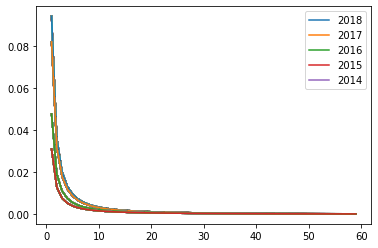

In [50]:
bval_2 = bval[4:]
dval_2 = dval[4:]
for m in range(len(bval_2)):
    x = []
    y= []
    b = bval_2[m]
    d = dval_2[m]
    for i in range(100):
        x.append(i)
        y.append(prime3(x[i],b,d))
        plt.plot(x,y,label= str(year2[m]))
    plt.plot(x,y)
plt.legend(["2018", "2017", "2016", "2015", "2014"])

In [ ]:
3#